# Transformer Drills

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
import logging
import matplotlib.pyplot as plt
import math 
import random

## Configure Log Settings


In [2]:
logging.basicConfig(filename = "logs.log", format = "%(asctime)s -- %(message)s", datefmt='%m/%d/%Y %I:%M:%S %p', level = logging.INFO)

## Load Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()
logging.info("Dataset Upload successfully")
logging.info(f"X training set shape:{X_train.shape}")
logging.info(f"y training set shape:{y_train.shape}")
logging.info(f"X test set shape:{X_test.shape}")
logging.info(f"y training set shape:{y_test.shape}")

## HyperParameters

In [26]:
learning_rate = 1e-3
batch_size = 256
image_size = 72 
patch_size = 6
num_patches = int(image_size**2/patch_size**2)
epochs = 1000



## Functions


In [5]:
#Normalize pixels
def normalize_images(images):
    images = np.asarray(images)/255.0
    return images

X_train = normalize_images(X_train)
X_test = normalize_images(X_test)

(72, 72, 3)


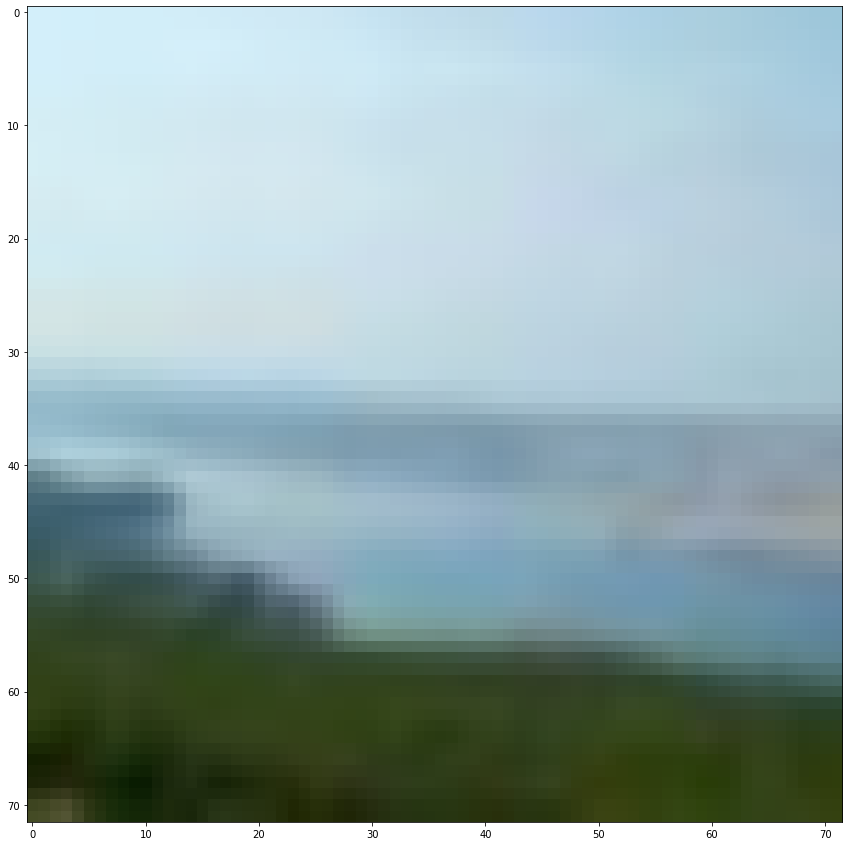

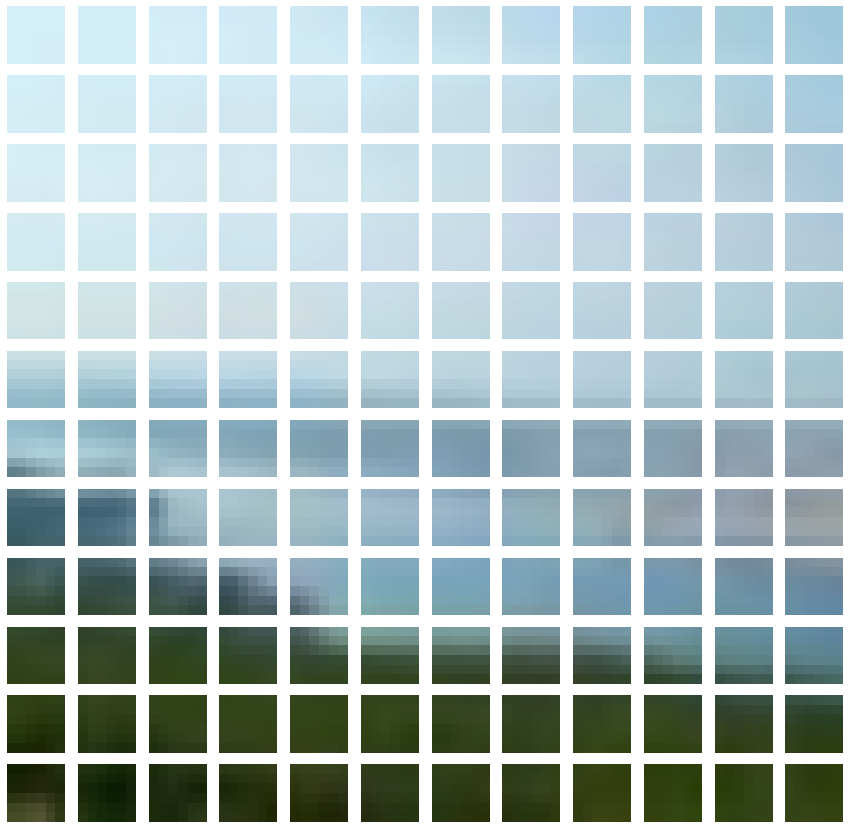

In [24]:
def create_patches(images, plot_sample = True):
    if plot_sample:
        #Pick a random image and resize to desired shape
        sample_image = images[random.randint(0, len(X_train))]
        sample_image = tf.image.resize(tf.convert_to_tensor(sample_image), size = (image_size, image_size))
        logging.info(f"Sample Image Shape: {sample_image.shape}")
        
        # Plotting Original Image
        fig = plt.figure(figsize=(15,15))
        fig.add_subplot()
        plt.title("Original Image")
        plt.imshow(sample_image)
        
        #Plotting Patched Image
        plt.title("Patched Image")
        plt.suptitle(f"{} {patch_size} x {patch_size} Patches")
    
        fig = plt.figure(figsize=(15,15))
        patched_image = tf.image.extract_patches(tf.expand_dims(sample_image,0),
                                                sizes = [1, patch_size, patch_size, 1],
                                                strides = [1, patch_size,patch_size, 1],
                                                rates = [1,1,1,1],
                                                padding = "VALID")
        patched_image = tf.reshape(patched_image, (1,-1,patched_image.shape[-1]))
        for i, ax in enumerate(range(patched_image.shape[1])):
            fig.add_subplot(12, 12, i + 1)
            plt.imshow(tf.reshape(patched_image[0][i], (patch_size,patch_size,3)))
            plt.axis("off")
    
create_patches(X_train)   

# def positional_encoding(images):
#     pass